In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

EPOCHS = 10

#wczytaj zbiór mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

2024-01-22 10:35:26.173247: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-22 10:35:26.227274: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-22 10:35:26.939152: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


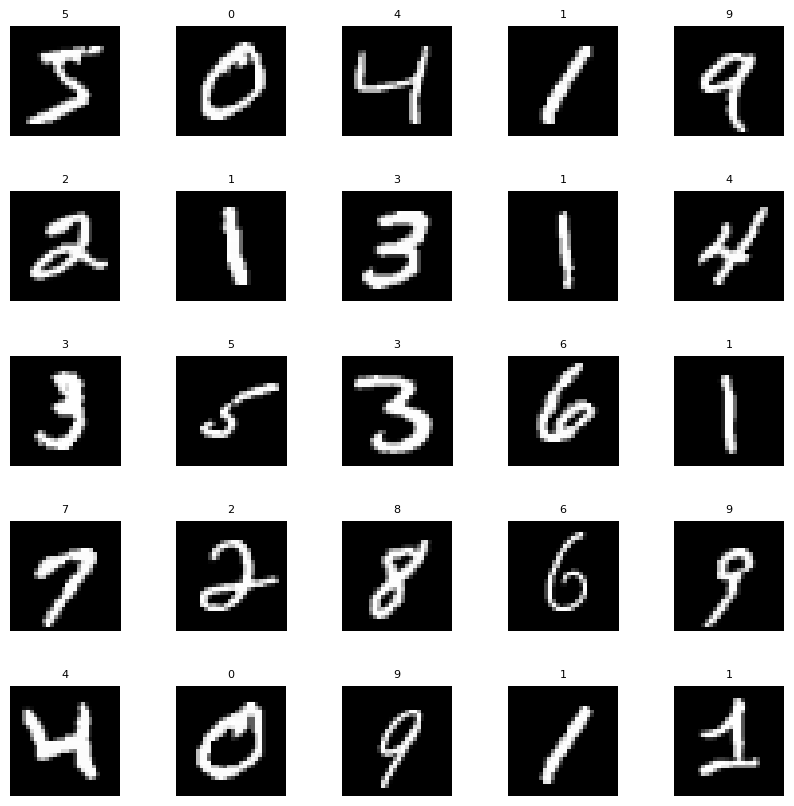

In [2]:
#dla przypomnienia, wyświetl 25 elementów zbioru treningowego 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1) #numeracja musi być od 1
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(str(y_train[i]), fontsize = 8)
    plt.axis("off")

In [3]:
#znormalizuj zbiór treningowy i testestowy
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
#zbuduj sieć o 6 warstwach:
#1. flatten
#2. dense o 32 neuronach
#3. dense o mniejszej liczbie neuronów
#4. dense o takiej samej liczbie neuronów jak w punkcie 3 
#5. dense o 28*28 neuronach i sigmoidalnej warstwie aktywacji
#6. o następującej warstwie: Reshape((28,28)) aby powrócić do pierwotnego kształtu obrazu

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Reshape

model = Sequential()
model.add(Flatten(input_shape=(28,28))) 
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(784, activation = 'sigmoid'))
model.add(Reshape((28,28)))

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

2024-01-22 10:35:29.469791: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-01-22 10:35:29.469835: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: dziobak
2024-01-22 10:35:29.469847: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: dziobak
2024-01-22 10:35:29.469948: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 520.61.5
2024-01-22 10:35:29.469974: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 520.61.5
2024-01-22 10:35:29.469980: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 520.61.5


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
 dense_2 (Dense)             (None, 32)                352       
                                                                 
 dense_3 (Dense)             (None, 784)               25872     
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 51,674
Trainable params: 51,674
Non-traina

In [6]:
#naucz sieć
history = model.fit(x_train, x_train, epochs = EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2076
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1528
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1437
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1404
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1385
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1374
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1365
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1358
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1352
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1347


In [9]:
hist = pd.DataFrame(history.history)

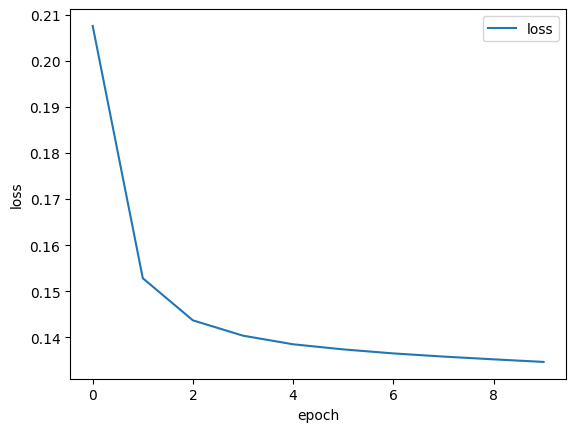

In [13]:
plt.plot(hist.loss, label = "loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

In [11]:
#zrób predykcję
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


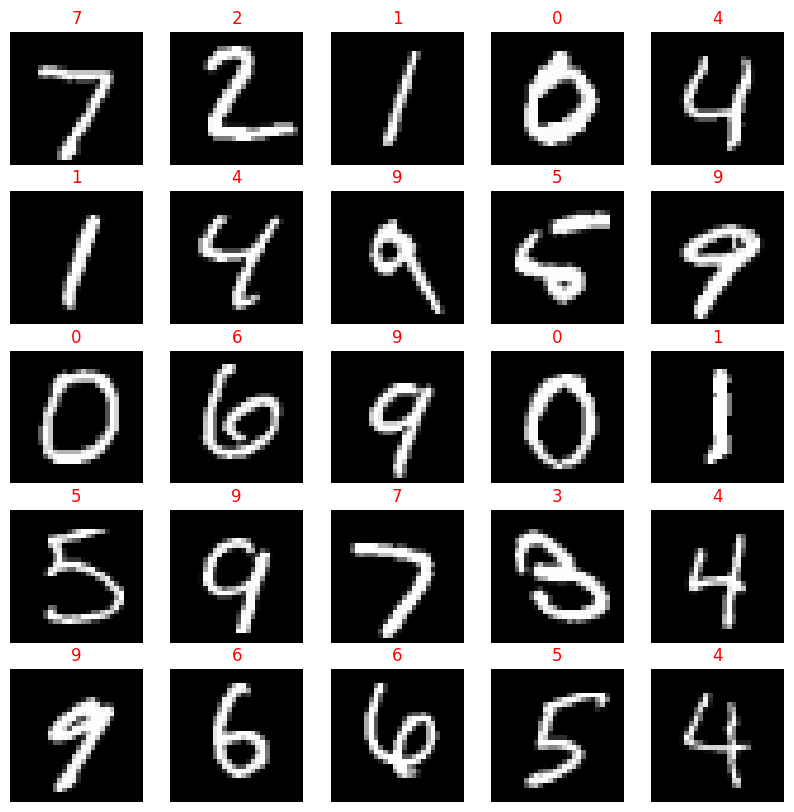

In [14]:
#wyświetl 25 elemntów ze predykowanego zbioru
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    if np.argmax(y_pred[i]) == y_test[i]:
        plt.title(y_test[i], color = 'green')
    else: 
        plt.title(str(y_test[i]), color = 'red') 